# YOLO on PYNQ-Z1 and Movidius NCS: Image example
This example tests the YOLO network with an image file.
### Load required packages

In [1]:
from mvnc import mvncapi as mvnc
import cv2
import numpy as np
import time
import PIL.Image
from matplotlib import pyplot as plt
%matplotlib inline 
import yolo_ncs,ncs

### Open the Movidius NCS

In [2]:
# Open the Movidius NCS device
ncsdev = ncs.MovidiusNCS()

# Load the graph file
if ncsdev.load_graph('../graph'):
    print('Graph file loaded to Movidius NCS')

Graph file loaded to Movidius NCS


### Load the image

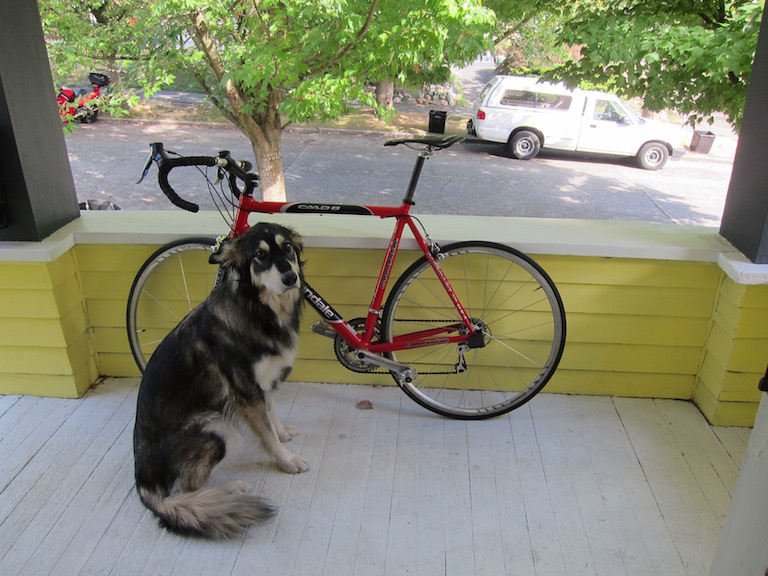

In [3]:
frame = cv2.imread('../images/dog.jpg')
frame = frame[:,:,(2,1,0)]

# Display image in Jupyter notebook
img = PIL.Image.fromarray(frame)
img

### Resize the image to the size required by the YOLO network (448x448)

Runtime: 0.12380170822143555


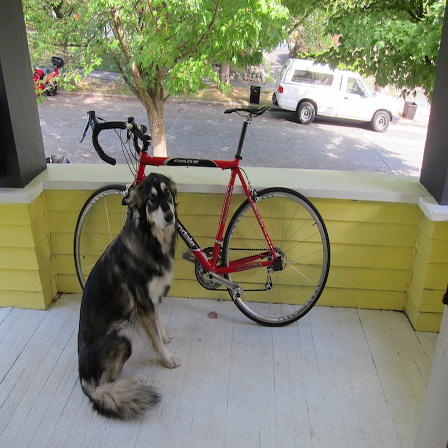

In [4]:
start_time = time.time()

small_frame = cv2.resize(frame, dsize=(448, 448), interpolation=cv2.INTER_CUBIC)
ncs_frame = small_frame.copy()/255.0

end_time = time.time()
print('Runtime:',end_time-start_time)

# Display image in Jupyter notebook
img = PIL.Image.fromarray(small_frame)
img

### Send image to the NCS

Runtime: 0.28554797172546387


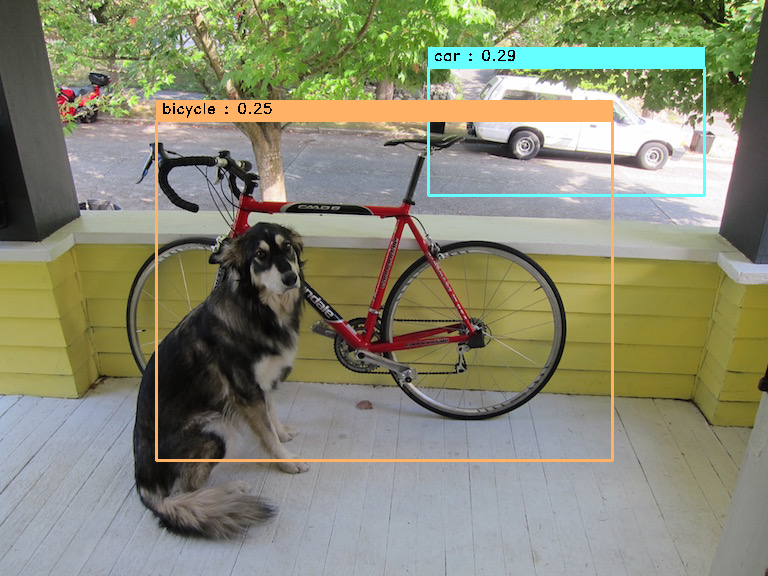

In [5]:
start_time = time.time()

ncsdev.graph.LoadTensor(ncs_frame.astype(np.float16), 'user object')
out, userobj = ncsdev.graph.GetResult()

end_time = time.time()

print ('Runtime:',end_time-start_time)

# Interpret results and draw boxes on the image
results = yolo_ncs.interpret_output(out.astype(np.float32), frame.shape[1], frame.shape[0]) # fc27 instead of fc12 for yolo_small

img_res = yolo_ncs.draw_boxes(frame, results, frame.shape[1], frame.shape[0])

# Display image in Jupyter notebook
img = PIL.Image.fromarray(img_res)
img


### Close the NCS device

In [6]:
ncsdev.close()